In [130]:
import pandas as pd
from matplotlib import pyplot as plt
import os
from pathlib import Path
import seaborn as sns

In [131]:
data_path = os.path.join(str(Path.home()), 'PycharmProjects/ML/src/data/sentiment_twitter')
for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/aleksandrkoval/PycharmProjects/ML/src/data/sentiment_twitter/test.csv
/Users/aleksandrkoval/PycharmProjects/ML/src/data/sentiment_twitter/train.csv
/Users/aleksandrkoval/PycharmProjects/ML/src/data/sentiment_twitter/labeled_data.csv


In [132]:
path = os.path.join(str(Path.home()), 'PycharmProjects/ML/src/data/sentiment_twitter')
test_path = os.path.join(path, os.listdir(path)[0])
train_path = os.path.join(path, os.listdir(path)[1])
label_path = os.path.join(path, os.listdir(path)[2])
os.listdir(path)

['test.csv', 'train.csv', 'labeled_data.csv']

In [133]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
df_label = pd.read_csv(label_path)
df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [134]:
print("shape: \n", df_train.shape, "\n")
print("describe \n", df_train.describe(), "\n")
print("info \n", df_train.info(), "\n")

shape: 
 (31962, 3) 

describe 
                  id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
info 
 None 



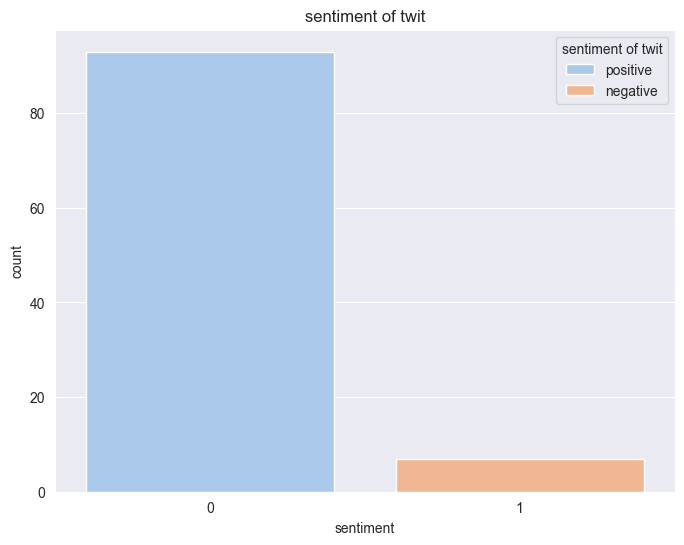

In [135]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='label', palette='pastel', stat='percent', hue='label')
plt.title('sentiment of twit')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.legend(title='sentiment of twit', labels=['positive', 'negative'])
plt.show()

Негативных данных немного. Посмотрим, что мы сможем увидеть на этом наборе

In [136]:
df_train.drop('id',axis=1,inplace=True)

In [137]:
df_label.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [138]:
df_label.shape

(24783, 7)

In [139]:
df_train.shape

(31962, 2)

In [140]:
df_test.shape

(17197, 2)

In [141]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='class', palette='pastel', stat='percent', hue='class')
plt.title('sentiment of twit')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.legend(title='sentiment of twit', labels=['positive', 'negative'])
plt.show()

ValueError: Could not interpret value `class` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

Подготовка данных для обработки

In [ ]:
import re
result = re.sub(r'India', 'the World', 'AV is largest Analytics community of India')
print(result)

In [ ]:
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
stopword=set(stopwords.words('english'))

In [ ]:
# выполним очистку текста от синтаксического и пунктуационного мусора
def clean_text(string): 
    string = str(string).lower() # Понизить регистры. Мы будем вызывать CountVectorizer, который по-умолчанию это выполняет, но лишний раз может оказаться не лишним.
    string = re.sub(r"[^a-zA-Z]", " ", string) # Оставляем только латинские буквы. Это сильное условие для английского текста, но не универсальное. Поэтому по развлекаемся точечно.
    string = re.sub(r'\[.*?\]', '', string) # разберёмся с квадратными скобками
    string = re.sub(r'https?://\S+|www\.\S+', '', string) # убрать адресные строки
    string = re.sub(r'<.*?>+', '', string) # убираем случайные HTML-теги
    string = re.sub(r'[^\w\s]', '', string) #убрать всю пунктуацию
    string = re.sub(r'\n', '', string) # удалим все переносы строки
    string = re.sub(r'\w*\d\w*', '', string) # убираем слова с цифрой в середине
    string = [word for word in string.split(' ') if word not in stopword] # очищаем текст от слов исключений
    string= " ".join(string)
    string = [stemmer.stem(word) for word in string.split(' ')] # приводим слова к исходному значению, убирая склонения
    string= " ".join(string)
    string = re.sub('  ', '', string) # уберём все двойные пробелы
    print(string)
    return string

In [227]:
df_train['tweet']=df_train['tweet'].apply(clean_text)
df_train

,label,tweet
0,0,user father dysfunct selfish drag kid dysfunct...
1,0,userus thanklyft credit use caus offer wheelc...
2,0,bihday majesti
3,0,model love u take u time ur
4,0,factsguidsocieti motiv
...,...,...
31957,0,ateus isz youuu
31958,0,see nina turner airwav tri wrap mantl genuin h...
31959,0,listen sad song monday morn otw work sad
31960,1,usersikhtempl vandaliscalgari wso condemnact


In [228]:
df_train.shape

(31962, 2)

In [232]:
df_label['tweet']=df_label['tweet'].apply(clean_text)
df_label

,label,tweet
0,0,rtmayasolovwoman complain clean hous ampman al...
1,1,rtboy dat cold tyga dwn bad cuffin dat hoeplac
2,1,rturkindofbrand dawg rtever fuck bitch start c...
3,1,rtc g anderson viva base look like tranni
4,1,rtshenikarobertshit hear might true might fake...
...,...,...
24778,1,muthaf lie lifeaskpearlcorey emanuel righttl t...
24779,0,gone broke wrong heart babidrov redneck crazi
24780,1,young buck wanna eat dat nigguh like aint fuck...
24781,1,youu got wild bitch tellin lie


In [204]:
df_train.head()

,label,tweet
0,0,user father dysfunct selfish drag kid dysfunct...
1,0,useruser thanklyft credit use caus offer whee...
2,0,bihday majesti
3,0,model love u take u time ur
4,0,factsguidsocieti motiv


In [ ]:
#проконтролируем тип наших данных
x=df_train['tweet']
y=df_train['label']
type(x)

Разделим нашу выборку на обучающую и тестовую

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

Запустим класс CountVectorizer. Этот класс позволит выполнить преобразование нашего текста в тензор частоты слов нашего списка твитов для каждого твита.

Этот класс позволяет также задавать n-граммы, смысловые последовательности слов, чтобы удержать контекст вхождения. Используем вхождение до 4 слов

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(ngram_range=(1,4))
x_train_vectorizer=count.fit_transform(x_train)

In [142]:
x_test_vectorizer=count.transform(x_test)
x_train_vectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Мы получили сильно разреженную матрицу с большим количеством нулей, но это ожидаемо

Выполним преобразование нашего тензора с помощью метода взвешивания важности слова в твите TF-IDF

In [143]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

In [144]:
x_train_tfidf = tfidf_transformer.fit_transform(x_train_vectorizer)
x_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [145]:
x_test_tfidf = tfidf_transformer.transform(x_test_vectorizer)
x_test_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [146]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Теперь наши данные готовы для обучения модели наивного Байесовского классификатора с мультиномиальным распределением. 

In [147]:
model_vectorizer= MultinomialNB().fit(x_train_vectorizer, y_train)

Произведём предсказание на нашей модели Vectorizer

In [148]:
prediction_vectorizer=model_vectorizer.predict(x_test_vectorizer)

Поинтересуемся качеством нашего предсказания. Для этого выведем матрицу ошибок для целевых y_test, и предсказанных, prediction_vectorizer, значений

In [149]:
print(confusion_matrix(y_test,prediction_vectorizer))

[[5920    0]
 [ 290  183]]


Этот результат нам показывает:
* TN = 5920 - модель правильно предсказала негативность твита
* FN = 290 - модель неправильно предсказала негативность твита
* TP = 183 - модель правильно предсказала позитивность твита
* FP = 0 - модель неправильно предсказала позитивность твита

Посмотрим подробный отчёт по классификации

In [150]:
print (classification_report(y_test, prediction_vectorizer))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      5920
           1       1.00      0.39      0.56       473

    accuracy                           0.95      6393
   macro avg       0.98      0.69      0.77      6393
weighted avg       0.96      0.95      0.95      6393



Мы получили очень хорошие результаты предсказания.
 
Точность соотнесения объекта класса к классам предсказанным, как этот класс - точность положительных прогнозов 95% и 100%

<h1 align="center"> $ precision = \frac{ TP }{ TP + FP } $ </h1>

Доля правильно идентифицированных положительных прогнозов, однако, показала результаты скромнее 100% и 39% 

<h1 align="center"> $ recall = \frac{ TP }{ TP + FN } $ </h1>

f1-score среднее гармоническое между precision и recall:

<h1 align="center"> $ f1score = 2*\frac{ recall * rpecision }{ recall + precision } $ </h1>

Интерпретация значений для f1 имеет смысл:
* f1-score > 0,9 = отлично.
* f1-score между 0,8 и 0,9 = хорошо,
* f1-score от 0,5 до 0,8 = среднее,
* f1-score < 0,5 = плохо.

Значит, мы получили очень хорошее предсказание для негативных твитов и чуть выше среднего для позитивных. Вероятно, это связано с недостаточностью данных

Повторим вычисления на модели TF-IDF

In [151]:
model_tfidf= MultinomialNB().fit(x_train_tfidf, y_train)
prediction_tfidf=model_tfidf.predict(x_test_tfidf)
print (classification_report(y_test, prediction_tfidf))
print(confusion_matrix(y_test,prediction_tfidf))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      5920
           1       1.00      0.11      0.19       473

    accuracy                           0.93      6393
   macro avg       0.97      0.55      0.58      6393
weighted avg       0.94      0.93      0.91      6393

[[5920    0]
 [ 422   51]]


Результаты прогноза оказались хуже, чем для Vectorizer.

Попробуем увеличить количество данных и сравнить результаты

Для этого воспользуемся источником дополнительных исследований https://github.com/t-davidson/hate-speech-and-offensive-language/tree/master/data

In [152]:
df_label = pd.read_csv(label_path)
df_label.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [235]:
df_label = pd.read_csv(label_path)
df_label.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)
df_label.replace({"class":{0: 1}}, inplace=True)
df_label.replace({'class':{2: 0}}, inplace=True)
df_label.rename(columns ={'class':'label'}, inplace = True)
df_label

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,0,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [236]:
frame=[df_train,df_label]
frame

[       label                                              tweet
 0          0  user father dysfunct selfish drag kid dysfunct...
 1          0   userus thanklyft credit use caus offer wheelc...
 2          0                                     bihday majesti
 3          0                        model love u take u time ur
 4          0                             factsguidsocieti motiv
 ...      ...                                                ...
 31957      0                                    ateus isz youuu
 31958      0  see nina turner airwav tri wrap mantl genuin h...
 31959      0           listen sad song monday morn otw work sad
 31960      1       usersikhtempl vandaliscalgari wso condemnact
 31961      0                                     thankus follow
 
 [31962 rows x 2 columns],
        label                                              tweet
 0          0  !!! RT @mayasolovely: As a woman you shouldn't...
 1          1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba

In [239]:
df_wide = pd.concat(frame, ignore_index=True)
df_wide

,label,tweet
0,0,user father dysfunct selfish drag kid dysfunct...
1,0,userus thanklyft credit use caus offer wheelc...
2,0,bihday majesti
3,0,model love u take u time ur
4,0,factsguidsocieti motiv
...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,0,"you've gone and broke the wrong heart baby, an..."
56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,1,youu got wild bitches tellin you lies


In [201]:
df_label.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [240]:
df_wide['tweet'] = df_wide['tweet'].apply(clean_text)
df_wide

,label,tweet
0,0,user father dysfunct selfish drag kid dysfunct...
1,0,userus thanklyft credit use caus offer wheelc...
2,0,bihday majesti
3,0,model love u take u time ur
4,0,factsguidsocieti motiv
...,...,...
56740,1,muthaf lie lifeaskpearlcorey emanuel righttl t...
56741,0,gone broke wrong heart babidrove redneck crazi
56742,1,young buck wanna eat dat nigguh like aint fuck...
56743,1,youu got wild bitch tellin lie


In [241]:
df_wide.tail()

,label,tweet
56740,1,muthaf lie lifeaskpearlcorey emanuel righttl t...
56741,0,gone broke wrong heart babidrove redneck crazi
56742,1,young buck wanna eat dat nigguh like aint fuck...
56743,1,youu got wild bitch tellin lie
56744,0,ruffl ntac eileen dahlia beauti color combin p...


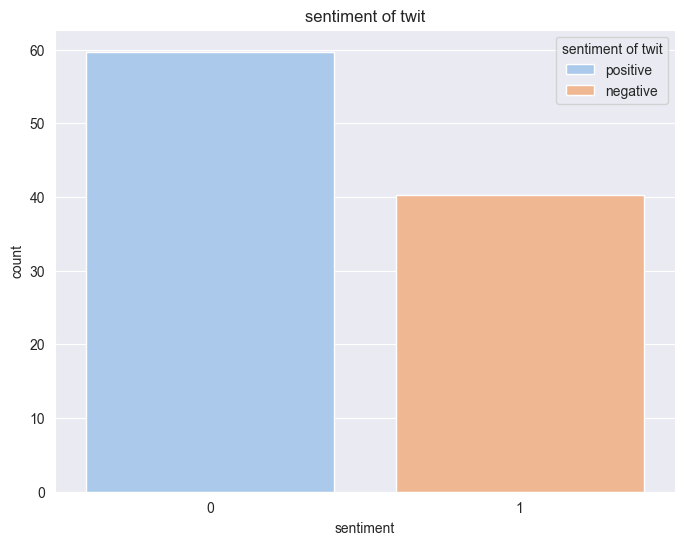

In [242]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_wide, x='label', palette='pastel', stat='percent', hue='label')
plt.title('sentiment of twit')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.legend(title='sentiment of twit', labels=['positive', 'negative'])
plt.show()


In [243]:
df_wide.shape

(56745, 2)

In [244]:
df_train.shape

(31962, 2)

Повторим обучение на новом наборе данных

In [245]:
x_train, x_test, y_train, y_test = train_test_split(df_wide['tweet'], df_wide['label'], test_size=0.2, shuffle=True)

In [246]:
count = CountVectorizer(ngram_range=(1, 4))
x_train_vectorizer = count.fit_transform(x_train)
x_test_vectorizer = count.transform(x_test)

In [247]:
x_train_vectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [248]:
x_train_tfidf = tfidf_transformer.fit_transform(x_train_vectorizer)
x_train_tfidf.toarray()
x_test_tfidf = tfidf_transformer.transform(x_test_vectorizer)
x_test_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [249]:
model_vectorizer = MultinomialNB().fit(x_train_vectorizer, y_train)
prediction_vectorizer = model_vectorizer.predict(x_test_vectorizer)
print(confusion_matrix(y_test,prediction_vectorizer))
print (classification_report(y_test, prediction_vectorizer))

[[6294  524]
 [ 525 4006]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6818
           1       0.88      0.88      0.88      4531

    accuracy                           0.91     11349
   macro avg       0.90      0.90      0.90     11349
weighted avg       0.91      0.91      0.91     11349



In [250]:
model_tfidf= MultinomialNB().fit(x_train_tfidf, y_train)
prediction_tfidf=model_tfidf.predict(x_test_tfidf)
print(confusion_matrix(y_test,prediction_tfidf))
print (classification_report(y_test, prediction_tfidf))

[[6536  282]
 [ 866 3665]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6818
           1       0.93      0.81      0.86      4531

    accuracy                           0.90     11349
   macro avg       0.91      0.88      0.89     11349
weighted avg       0.90      0.90      0.90     11349



In [252]:
x_test_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 80041 stored elements and shape (11349, 565648)>

Мы получили значения сильно лучше, чем на первом наборе

In [251]:
text = "I love love love love love love love"
text = clean_text(text)
model_tfidf.predict(text)

ValueError: Expected 2D array, got scalar array instead:
array=love love love love love love love.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.